<<< [Index](index.ipynb)
# Grouping Data
In this chapter, you'll learn how to **identify and split DataFrames by groups or categories for further aggregation or analysis**.
You'll also learn **how to transform and filter your data**, including how to detect outliers and impute missing values. 
Knowing how to effectively group data in pandas can be a seriously powerful addition to your data science toolbox.



### Categoricals and groupby
   
  * [Grouping by multiple columns](#gmc)
  * [Grouping by another series](#gas)
  
### [Groupby and aggregation](#ga)
  * [Computing multiple aggregates of multiple columns](#cma)
  * [Aggregating on index levels/fields](#ail)
  * [Grouping on a function of the index](#gfi)
  
  
### [Groupby and transformation](#gt)
  * [Detecting outliers with Z-Scores ](#dtz)
  * [Filling missing data (imputation) by group](#fmd)
  * [Other transformations with .apply](#ota)
  
### [Groupby and filtering](#gf)
 * [Grouping and filtering with .apply()](#gfa)
 * [Grouping and filtering with .filter()](#gff)
 * [Filtering and grouping with .map()](#fgm)

## [Case Study ](#cs)

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


##  Categoricals and groupby

<p id ='gmc'><p>
### Grouping by multiple columns

In [3]:
titanic = pd.read_csv('./data/titanic.csv')
titanic.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

The 'pclass' column identifies which class of ticket was purchased by the passenger and the 'embarked' column indicates at which of the three ports the passenger boarded the Titanic. 'S' stands for Southampton, England, 'C' for Cherbourg, France and 'Q' for Queenstown, Ireland.


Your job is to first group by the 'pclass' column and count the number of rows in each class using the 'survived' column



In [4]:
by_class = titanic.groupby('pclass')['survived'].count()
by_class

pclass
1    323
2    277
3    709
Name: survived, dtype: int64

You will then group by the 'embarked' and 'pclass' columns and count the number of passengers.

In [5]:
count_mult = titanic.groupby(['embarked', 'pclass'])['survived'].count()
count_mult


embarked  pclass
C         1         141
          2          28
          3         101
Q         1           3
          2           7
          3         113
S         1         177
          2         242
          3         495
Name: survived, dtype: int64

<p id ='gas'><p>
### Grouping by another series

In [11]:
life = pd.read_csv('./data/life_expectancy2.csv', index_col='Country')
life.head()

1964    1965    1966    1967    1968    1969    1970  \
Country                                                                       
Afghanistan          33.639  34.152  34.662  35.170  35.674  36.172  36.663   
Albania              65.475  65.863  66.122  66.316  66.500  66.702  66.948   
Algeria              47.953  48.389  48.806  49.205  49.592  49.976  50.366   
Angola               34.604  35.007  35.410  35.816  36.222  36.627  37.032   
Antigua and Barbuda  63.775  64.149  64.511  64.865  65.213  65.558  65.898   

                       1971    1972    1973   ...      2004    2005    2006  \
Country                                       ...                             
Afghanistan          37.143  37.614  38.075   ...    56.583  57.071  57.582   
Albania              67.251  67.595  67.966   ...    75.725  75.949  76.124   
Algeria              50.767  51.195  51.670   ...    69.682  69.854  70.020   
Angola               37.439  37.846  38.247   ...    48.036  48.572  49.041   
Antigua and Barbuda  66.232  66.558  66.875   ...    74.355  74.544  74.729   

                       2007    2008    2009    2010    2011    2012    2013  
Country                                                                      
Afghanistan          58.102  58.618  59.124  59.612  60.079  60.524  60.947  
Albania              76.278  76.433  76.598  76.780  76.979  77.185  77.392  
Algeria              70.180  70.332  70.477  70.615  70.747  70.874  71.000  
Angola               49.471  49.882  50.286  50.689  51.094  51.498  51.899  
Antigua and Barbuda  74.910  75.087  75.263  75.437  75.610  75.783  75.954  

[5 rows x 50 columns]

In [12]:
regions = pd.read_csv('./data/regions.csv', index_col='Country')
regions.head()

region
Country                                        
Afghanistan                          South Asia
Albania                   Europe & Central Asia
Algeria              Middle East & North Africa
Angola                       Sub-Saharan Africa
Antigua and Barbuda                     America

Use the region information to group the countries in the life expectancy DataFrame and compute the mean value for 2010.

In [14]:
life.groupby(regions['region'])['2010'].mean()

region
America                       74.037350
East Asia & Pacific           73.405750
Europe & Central Asia         75.656387
Middle East & North Africa    72.805333
South Asia                    68.189750
Sub-Saharan Africa            57.575080
Name: 2010, dtype: float64

<p id ='ga'><p>
## Groupby and aggregation

<p id ='cma'><p>
### Computing multiple aggregates of multiple columns

The `.agg()` method can be used with a tuple or list of aggregations as input. When applying multiple aggregations on multiple columns, the aggregated DataFrame has a multi-level column index.



In [15]:
titanic.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [21]:
aggregated = titanic.groupby('pclass')[['age', 'fare']].agg(['max', 'median'])
aggregated


age             fare         
         max median       max   median
pclass                                
1       80.0   39.0  512.3292  60.0000
2       70.0   29.0   73.5000  15.0458
3       74.0   24.0   69.5500   8.0500

<p id ='ail'><p>
### Aggregating on index levels/fields

In [24]:
gapminder = pd.read_csv('./data/gapminder_tidy.csv', index_col=['Year','region','Country'])
gapminder.head()

fertility    life  population  child_mortality  \
Year region     Country                                                       
1964 South Asia Afghanistan      7.671  33.639  10474903.0            339.7   
1965 South Asia Afghanistan      7.671  34.152  10697983.0            334.1   
1966 South Asia Afghanistan      7.671  34.662  10927724.0            328.7   
1967 South Asia Afghanistan      7.671  35.170  11163656.0            323.3   
1968 South Asia Afghanistan      7.671  35.674  11411022.0            318.1   

                                gdp  
Year region     Country              
1964 South Asia Afghanistan  1182.0  
1965 South Asia Afghanistan  1182.0  
1966 South Asia Afghanistan  1168.0  
1967 South Asia Afghanistan  1173.0  
1968 South Asia Afghanistan  1187.0

Your job is to create a multi-level DataFrame of the columns `'Year'`, `'Region'` and `'Country'`. Next you'll group the DataFrame by the `'Year'` and '`Region'` levels. Finally, you'll apply a dictionary aggregation to compute the total population, spread of per capita GDP values and average child mortality rate.

Group gapminder with a level of ['Year','region'] using its level parameter.

In [30]:
by_year_region = gapminder.groupby(['Year', 'region'])

In [31]:
# Define the function to compute spread: spread
def spread(series):
    return series.max() - series.min()


In [36]:
# Create the dictionary: aggregator
aggregator = {'population':'sum', 'child_mortality':'sum', 'gdp':'sum'}


In [37]:
aggregated = by_year_region.agg(aggregator)
aggregated.head(10)

population  child_mortality       gdp
Year region                                                             
1964 America                     4.621957e+08          3418.52  218044.0
     East Asia & Pacific         1.110668e+09          2969.51  167219.0
     Europe & Central Asia       6.988545e+08          2894.51  468483.0
     Middle East & North Africa  1.180955e+08          3412.50  208281.0
     South Asia                  6.250739e+08          2055.38    9871.0
     Sub-Saharan Africa          2.541011e+08         11462.02   95477.0
1965 America                     4.715780e+08          3323.86  226443.0
     East Asia & Pacific         1.134218e+09          2861.90  172549.0
     Europe & Central Asia       7.062355e+08          2780.53  484787.0
     Middle East & North Africa  1.213494e+08          3270.02  239039.0

<p id ='gfi'><p>
### Grouping on a function of the index

In [49]:
sales = pd.read_csv('./data/sales-feb-2015.csv', index_col='Date', parse_dates=True)
print(sales.shape)
sales.head()

(19, 3)


Company   Product  Units
Date                                                 
2015-02-02 08:30:00            Hooli  Software      3
2015-02-02 21:00:00        Mediacore  Hardware      9
2015-02-03 14:00:00          Initech  Software     13
2015-02-04 15:30:00        Streeplex  Software     13
2015-02-04 22:00:00  Acme Coporation  Hardware     14

Your job is to group the sales data by the day of the week and aggregate the sum of the 'Units' column.

In [58]:
# Create sum: units_sum
units_sum = sales.groupby(sales.index.strftime('%a'))['Units'].sum()
units_sum

Mon    48
Sat     7
Thu    59
Tue    13
Wed    48
Name: Units, dtype: int64

Your job is to group the sales data by the day of the month and aggregate the sum of the 'Units' column.

In [57]:
sales.groupby(sales.index.strftime('%d'))['Units'].sum()

02    12
03    13
04    27
05    29
07     1
09    26
11    11
16    10
19    26
21     6
25    10
26     4
Name: Units, dtype: int64

<p id ='gt'><p>
## Groupby and transformation

In [72]:
gapminder = pd.read_csv('./data/gapminder_tidy.csv', index_col='Year')
gapminder_2010 = gapminder.loc[2010]
gapminder_2010 =gapminder_2010.reset_index()
del gapminder_2010['Year']
gapminder_2010.head()

Country  fertility    life  population  child_mortality  \
0          Afghanistan      5.659  59.612  31411743.0            105.0   
1              Albania      1.741  76.780   3204284.0             16.6   
2              Algeria      2.817  70.615  35468208.0             27.4   
3               Angola      6.218  50.689  19081912.0            182.5   
4  Antigua and Barbuda      2.130  75.437     88710.0              9.9   

       gdp                      region  
0   1637.0                  South Asia  
1   9374.0       Europe & Central Asia  
2  12494.0  Middle East & North Africa  
3   7047.0          Sub-Saharan Africa  
4  20567.0                     America

<p id ='dtz'><p>
### Detecting outliers with Z-Scores 

In [73]:
from scipy.stats import zscore

In [77]:
# Group gapminder_2010: standardized
standardized = gapminder_2010.groupby('region')['life', 'fertility'].transform(zscore)
standardized.head()

life  fertility
0 -1.743601   2.504732
1  0.226367   0.010964
2 -0.440196  -0.003972
3 -0.882537   1.095653
4  0.240607  -0.363761

In [78]:
gm_outliers = gapminder_2010.loc[(standardized['life'] < -3) | (standardized['fertility'] > 3)]
gm_outliers

Country  fertility    life  population  child_mortality     gdp  \
72     Guatemala      3.974  71.100  14388929.0             34.5  6849.0   
76         Haiti      3.350  45.000   9993247.0            208.8  1518.0   
176   Tajikistan      3.780  66.830   6878637.0             52.6  2110.0   
179  Timor-Leste      6.237  65.952   1124355.0             63.8  1777.0   

                    region  
72                 America  
76                 America  
176  Europe & Central Asia  
179    East Asia & Pacific

<p id ='fmd'><p>
### Filling missing data (imputation) by group

In [79]:
titanic.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

Your job is to fill in missing `'age'` values for passengers on the Titanic with the `median` age from their `'gender'` and `'pclass'`. To do this, you'll group by the `'sex'` and `'pclass'` columns and transform each group with a custom function to call .fillna() and impute the median value.



In [84]:
# Create a groupby object: by_sex_class
by_sex_class = titanic.groupby(['sex', 'pclass'])
by_sex_class

In [85]:
def impute_median(series):
    return series.fillna(series.median())

In [89]:
titanic.age =by_sex_class['age'].transform(impute_median)

In [93]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1309 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


<p id ='ota'><p>
### Other transformations with `.apply`

In [96]:
gapminder_2010 = gapminder_2010.set_index('Country')
gapminder_2010.head()

fertility    life  population  child_mortality      gdp  \
Country                                                                        
Afghanistan              5.659  59.612  31411743.0            105.0   1637.0   
Albania                  1.741  76.780   3204284.0             16.6   9374.0   
Algeria                  2.817  70.615  35468208.0             27.4  12494.0   
Angola                   6.218  50.689  19081912.0            182.5   7047.0   
Antigua and Barbuda      2.130  75.437     88710.0              9.9  20567.0   

                                         region  
Country                                          
Afghanistan                          South Asia  
Albania                   Europe & Central Asia  
Algeria              Middle East & North Africa  
Angola                       Sub-Saharan Africa  
Antigua and Barbuda                     America

In [121]:
def disparity(gr):
    # Compute the spread of gr['gdp']: s
    s = gr['gdp'].max() - gr['gdp'].min()
    # Compute the z-score of gr['gdp'] as (gr['gdp']-gr['gdp'].mean())/gr['gdp'].std(): z
    z = (gr['gdp'] - gr['gdp'].mean())/gr['gdp'].std()
    # Return a DataFrame with the inputs {'z(gdp)':z, 'regional spread(gdp)':s}
    return pd.DataFrame({'z(gdp)':z , 'regional spread(gdp)':s})

In [122]:
reg_disp = gapminder_2010.groupby('region').apply(disparity)
reg_disp.loc[['United States', 'United Kingdom', 'China']]

z(gdp)  regional spread(gdp)
Country                                       
United States   3.013374               47855.0
United Kingdom  0.572873               89037.0
China          -0.432756               96993.0

<p id ='gf'><p>
## Groupby and filtering

In [112]:
# Create a groupby object using titanic over the 'sex' column: by_sex
by_sex = titanic.groupby('sex')
by_sex

<p id ='gfa'><p>
### Grouping and filtering with `.apply()`

In this exercise you'll take the Titanic data set and analyze survival rates from the 'C' deck, which contained the most passengers. To do this you'll group the dataset by 'sex' and then use the .apply() method on a provided user defined function which calculates the mean survival rates on the 'C' deck:



In [113]:
def c_deck_survival(gr):

    c_passengers = gr['cabin'].str.startswith('C').fillna(False)

    return gr.loc[c_passengers, 'survived'].mean()

In [114]:
by_sex.apply(c_deck_survival)

sex
female    0.913043
male      0.312500
dtype: float64

In [115]:
titanic.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [120]:
titanic.loc[titanic['cabin'].str.startswith('C').fillna(False), 'survived'].mean()

0.6063829787234043

<p id ='gff'><p>
### Grouping and filtering with `.filter()`

In [126]:
sales = pd.read_csv('./data/sales-feb-2015.csv', index_col='Date', parse_dates=True)
sales.head()

Company   Product  Units
Date                                                 
2015-02-02 08:30:00            Hooli  Software      3
2015-02-02 21:00:00        Mediacore  Hardware      9
2015-02-03 14:00:00          Initech  Software     13
2015-02-04 15:30:00        Streeplex  Software     13
2015-02-04 22:00:00  Acme Coporation  Hardware     14

In this exercise, you'll take the February sales data and remove entries from companies that purchased less than or equal to 35 Units in the whole month.



In [128]:
sales.groupby('Company')['Units'].sum()

Company
Acme Coporation    34
Hooli              30
Initech            30
Mediacore          45
Streeplex          36
Name: Units, dtype: int64

In [129]:
sales.groupby('Company').filter(lambda g: g['Units'].sum()>35)

Company   Product  Units
Date                                           
2015-02-02 21:00:00  Mediacore  Hardware      9
2015-02-04 15:30:00  Streeplex  Software     13
2015-02-09 09:00:00  Streeplex   Service     19
2015-02-09 13:00:00  Mediacore  Software      7
2015-02-19 11:00:00  Mediacore  Hardware     16
2015-02-19 16:00:00  Mediacore   Service     10
2015-02-21 05:00:00  Mediacore  Software      3
2015-02-26 09:00:00  Streeplex   Service      4

<p id ='fgm'><p>
### Filtering and grouping with `.map()`

In [134]:
under10 =(titanic['age']<10).map({True:'under 10', False:'over 10'})
under10.head()

0     over 10
1    under 10
2    under 10
3     over 10
4     over 10
Name: age, dtype: object

In [141]:
# Group by under10 and compute the survival rate
survived_mean_1 = titanic.groupby(under10)['survived'].mean()

In [142]:
survived_mean_1

age
over 10     0.366748
under 10    0.609756
Name: survived, dtype: float64

In [144]:
# Group by under10 and pclass and compute the survival rate
survived_mean_2 = titanic.groupby(['pclass', under10])['survived'].mean()
print(survived_mean_2)

pclass  age     
1       over 10     0.617555
        under 10    0.750000
2       over 10     0.380392
        under 10    1.000000
3       over 10     0.238897
        under 10    0.446429
Name: survived, dtype: float64


<p id = 'cs'> <p>
# Bringing it all together


Here, you will bring together everything you have learned in this course while working with data recorded from the Summer Olympic games that goes as far back as 1896! This is a rich dataset that will allow you to fully apply the data manipulation techniques you have learned. You will pivot, unstack, group, slice, and reshape your data as you explore this dataset and uncover some truly fascinating insights. Enjoy!



In [146]:
olympic = pd.read_csv('./data/all_medalists.csv')
olympic.tail()

City  Edition      Sport       Discipline               Athlete  \
29211  Beijing     2008  Wrestling  Wrestling Gre-R        ENGLICH, Mirko   
29212  Beijing     2008  Wrestling  Wrestling Gre-R  MIZGAITIS, Mindaugas   
29213  Beijing     2008  Wrestling  Wrestling Gre-R       PATRIKEEV, Yuri   
29214  Beijing     2008  Wrestling  Wrestling Gre-R         LOPEZ, Mijain   
29215  Beijing     2008  Wrestling  Wrestling Gre-R        BAROEV, Khasan   

       NOC Gender       Event Event_gender   Medal  
29211  GER    Men   84 - 96kg            M  Silver  
29212  LTU    Men  96 - 120kg            M  Bronze  
29213  ARM    Men  96 - 120kg            M  Bronze  
29214  CUB    Men  96 - 120kg            M    Gold  
29215  RUS    Men  96 - 120kg            M  Silver

In [148]:
olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
City            29216 non-null object
Edition         29216 non-null int64
Sport           29216 non-null object
Discipline      29216 non-null object
Athlete         29216 non-null object
NOC             29216 non-null object
Gender          29216 non-null object
Event           29216 non-null object
Event_gender    29216 non-null object
Medal           29216 non-null object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


You now want to find the total number of medals awarded to the USA per edition. To do this, filter the 'USA' rows and use the groupby() function to put the 'Edition' column on the index:

In [151]:
olympic.loc[olympic.NOC =='USA'].groupby('Edition')['Medal'].count()

Edition
1896     20
1900     55
1904    394
1908     63
1912    101
1920    193
1924    198
1928     84
1932    181
1936     92
1948    148
1952    130
1956    118
1960    112
1964    150
1968    149
1972    155
1976    155
1984    333
1988    193
1992    224
1996    260
2000    248
2004    264
2008    315
Name: Medal, dtype: int64

### Using `.value_counts()` for ranking
Notice that .value_counts() sorts by values by default. The result is returned as a Series of counts indexed by unique entries from the original Series with values (counts) ranked in descending order.



In [155]:
olympic['NOC'].value_counts().head(15)

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64

### Using `.pivot_table()` to count medals by type



In [156]:
olympic.head()

City  Edition     Sport Discipline             Athlete  NOC Gender  \
0  Athens     1896  Aquatics   Swimming       HAJOS, Alfred  HUN    Men   
1  Athens     1896  Aquatics   Swimming    HERSCHMANN, Otto  AUT    Men   
2  Athens     1896  Aquatics   Swimming   DRIVAS, Dimitrios  GRE    Men   
3  Athens     1896  Aquatics   Swimming  MALOKINIS, Ioannis  GRE    Men   
4  Athens     1896  Aquatics   Swimming  CHASAPIS, Spiridon  GRE    Men   

                        Event Event_gender   Medal  
0              100m freestyle            M    Gold  
1              100m freestyle            M  Silver  
2  100m freestyle for sailors            M  Bronze  
3  100m freestyle for sailors            M    Gold  
4  100m freestyle for sailors            M  Silver

Construct a pivot table counted from the DataFrame medals aggregating by count. Use 'NOC' as the index, 'Athlete' for the values, and 'Medal' for the columns.

In [160]:
counted = olympic.pivot_table(index='NOC', columns='Medal', values = 'Athlete', aggfunc='count')
counted.head()

Medal  Bronze  Gold  Silver
NOC                        
AFG       1.0   NaN     NaN
AHO       NaN   NaN     1.0
ALG       8.0   4.0     2.0
ANZ       5.0  20.0     4.0
ARG      88.0  68.0    83.0

In [164]:
counted['totals'] = counted.sum(axis='columns')

In [165]:
counted.head()

Medal  Bronze  Gold  Silver  total  totals
NOC                                       
AFG       1.0   NaN     NaN    1.0     2.0
AHO       NaN   NaN     1.0    1.0     2.0
ALG       8.0   4.0     2.0   14.0    28.0
ANZ       5.0  20.0     4.0   29.0    58.0
ARG      88.0  68.0    83.0  239.0   478.0

In [166]:
counted = counted.sort_values(by= 'totals', ascending=False)
counted.head()

Medal  Bronze    Gold  Silver   total  totals
NOC                                          
USA    1052.0  2088.0  1195.0  4335.0  8670.0
URS     584.0   838.0   627.0  2049.0  4098.0
GBR     505.0   498.0   591.0  1594.0  3188.0
FRA     475.0   378.0   461.0  1314.0  2628.0
ITA     374.0   460.0   394.0  1228.0  2456.0

### Applying `.drop_duplicates()`
What could be the difference between the 'Event_gender' and 'Gender' columns? You should be able to evaluate your guess by looking at the unique values of the pairs (Event_gender, Gender) in the data. In particular, you should not see something like (Event_gender='M', Gender='Women'). However, you will see that, strangely enough, there is an observation with (Event_gender='W', Gender='Men').




In [167]:
olympic.head()

City  Edition     Sport Discipline             Athlete  NOC Gender  \
0  Athens     1896  Aquatics   Swimming       HAJOS, Alfred  HUN    Men   
1  Athens     1896  Aquatics   Swimming    HERSCHMANN, Otto  AUT    Men   
2  Athens     1896  Aquatics   Swimming   DRIVAS, Dimitrios  GRE    Men   
3  Athens     1896  Aquatics   Swimming  MALOKINIS, Ioannis  GRE    Men   
4  Athens     1896  Aquatics   Swimming  CHASAPIS, Spiridon  GRE    Men   

                        Event Event_gender   Medal  
0              100m freestyle            M    Gold  
1              100m freestyle            M  Silver  
2  100m freestyle for sailors            M  Bronze  
3  100m freestyle for sailors            M    Gold  
4  100m freestyle for sailors            M  Silver

In [172]:
olympic[['Event_gender', 'Gender']].drop_duplicates()

Event_gender Gender
0                M    Men
348              X    Men
416              W  Women
639              X  Women
23675            W    Men

### Finding possible errors with `.groupby()`



In [173]:
olympic.groupby(['Event_gender', 'Gender']).count()

City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218

see that there is only one suspicious row: This is likely a data error.

### Locating suspicious data

In [177]:
olympic[(olympic.Event_gender == 'W') & (olympic.Gender == 'Men')]['Athlete']

23675    CHEPCHUMBA, Joyce
Name: Athlete, dtype: object

### Using `.nunique()` to rank by distinct sports

You may want to know which countries won medals in the most distinct sports. The .nunique() method is the principal aggregation here. Given a categorical Series S, S.nunique() returns the number of distinct categories.

In [181]:
olympic.groupby(['NOC'])['Sport'].count().sort_values(ascending =False).head()

NOC
USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
Name: Sport, dtype: int64

In [184]:
olympic.groupby(['NOC'])['Sport'].nunique().sort_values(ascending = False).head()

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
Name: Sport, dtype: int64

### Counting USA vs. USSR Cold War Olympic Sports

In [185]:
olympic.head()

City  Edition     Sport Discipline             Athlete  NOC Gender  \
0  Athens     1896  Aquatics   Swimming       HAJOS, Alfred  HUN    Men   
1  Athens     1896  Aquatics   Swimming    HERSCHMANN, Otto  AUT    Men   
2  Athens     1896  Aquatics   Swimming   DRIVAS, Dimitrios  GRE    Men   
3  Athens     1896  Aquatics   Swimming  MALOKINIS, Ioannis  GRE    Men   
4  Athens     1896  Aquatics   Swimming  CHASAPIS, Spiridon  GRE    Men   

                        Event Event_gender   Medal  
0              100m freestyle            M    Gold  
1              100m freestyle            M  Silver  
2  100m freestyle for sailors            M  Bronze  
3  100m freestyle for sailors            M    Gold  
4  100m freestyle for sailors            M  Silver

In [189]:
during_cold_war = (1952<=olympic.Edition) & (olympic.Edition<=1988)

In [193]:
during_cold_war.value_counts()

False    17637
True     11579
Name: Edition, dtype: int64

In [195]:
# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = olympic.NOC.isin(['USA', 'URS'])
is_usa_urs.value_counts()


False    22832
True      6384
Name: NOC, dtype: int64

In [197]:
cold_war_medals = olympic[is_usa_urs & during_cold_war]
cold_war_medals.head()

City  Edition     Sport Discipline                     Athlete  NOC  \
8019  Helsinki     1952  Aquatics     Diving                 LEE, Samuel  USA   
8021  Helsinki     1952  Aquatics     Diving  STOVER-IRWIN, Juno Roslays  USA   
8022  Helsinki     1952  Aquatics     Diving         MCCORMICK, Patricia  USA   
8023  Helsinki     1952  Aquatics     Diving      MYERS-POPE, Paula Jean  USA   
8024  Helsinki     1952  Aquatics     Diving     CLOTWORTHY, Robert Lynn  USA   

     Gender           Event Event_gender   Medal  
8019    Men    10m platform            M    Gold  
8021  Women    10m platform            W  Bronze  
8022  Women    10m platform            W    Gold  
8023  Women    10m platform            W  Silver  
8024    Men  3m springboard            M  Bronze

In [201]:
cold_war_medals.groupby('NOC')['Sport'].nunique().sort_values(ascending= False)

NOC
URS    21
USA    20
Name: Sport, dtype: int64

### Counting USA vs. USSR Cold War Olympic Medals
For this exercise, you want to see which country, the USA or the USSR, won the most medals consistently over the Cold War period.





In [206]:
medals_won_by_country = olympic.pivot_table(index = 'Edition', columns='NOC' , values = 'Athlete', aggfunc='count')
medals_won_by_country.head()

NOC      AFG  AHO  ALG   ANZ  ARG  ARM  AUS   AUT  AZE  BAH  ...   URS  URU  \
Edition                                                      ...              
1896     NaN  NaN  NaN   NaN  NaN  NaN  2.0   5.0  NaN  NaN  ...   NaN  NaN   
1900     NaN  NaN  NaN   NaN  NaN  NaN  5.0   6.0  NaN  NaN  ...   NaN  NaN   
1904     NaN  NaN  NaN   NaN  NaN  NaN  NaN   1.0  NaN  NaN  ...   NaN  NaN   
1908     NaN  NaN  NaN  19.0  NaN  NaN  NaN   1.0  NaN  NaN  ...   NaN  NaN   
1912     NaN  NaN  NaN  10.0  NaN  NaN  NaN  14.0  NaN  NaN  ...   NaN  NaN   

NOC        USA  UZB  VEN  VIE  YUG  ZAM  ZIM   ZZX  
Edition                                             
1896      20.0  NaN  NaN  NaN  NaN  NaN  NaN   6.0  
1900      55.0  NaN  NaN  NaN  NaN  NaN  NaN  34.0  
1904     394.0  NaN  NaN  NaN  NaN  NaN  NaN   8.0  
1908      63.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
1912     101.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  

[5 rows x 138 columns]

In [207]:
cold_war_usa_urs_medals = medals_won_by_country.loc[1952:1988, ['USA', 'URS']]
cold_war_usa_urs_medals

NOC        USA    URS
Edition              
1952     130.0  117.0
1956     118.0  169.0
1960     112.0  169.0
1964     150.0  174.0
1968     149.0  188.0
1972     155.0  211.0
1976     155.0  285.0
1980       NaN  442.0
1984     333.0    NaN
1988     193.0  294.0

In [210]:
most_medals = cold_war_usa_urs_medals.idxmax(axis = 'columns')
most_medals

Edition
1952    USA
1956    URS
1960    URS
1964    URS
1968    URS
1972    URS
1976    URS
1980    URS
1984    USA
1988    URS
dtype: object

### Visualizing USA Medal Counts by Edition: Line Plot

Your job in this exercise is to visualize the medal counts by 'Edition' for the USA. The DataFrame has been pre-loaded for you as medals.




In [225]:
olympic.head()

City  Edition     Sport Discipline             Athlete  NOC Gender  \
0  Athens     1896  Aquatics   Swimming       HAJOS, Alfred  HUN    Men   
1  Athens     1896  Aquatics   Swimming    HERSCHMANN, Otto  AUT    Men   
2  Athens     1896  Aquatics   Swimming   DRIVAS, Dimitrios  GRE    Men   
3  Athens     1896  Aquatics   Swimming  MALOKINIS, Ioannis  GRE    Men   
4  Athens     1896  Aquatics   Swimming  CHASAPIS, Spiridon  GRE    Men   

                        Event Event_gender   Medal  
0              100m freestyle            M    Gold  
1              100m freestyle            M  Silver  
2  100m freestyle for sailors            M  Bronze  
3  100m freestyle for sailors            M    Gold  
4  100m freestyle for sailors            M  Silver

In [226]:
usa = olympic.loc[olympic.NOC =='USA']
usa.head()

City  Edition      Sport Discipline         Athlete  NOC Gender  \
11  Athens     1896  Athletics  Athletics   LANE, Francis  USA    Men   
13  Athens     1896  Athletics  Athletics   BURKE, Thomas  USA    Men   
15  Athens     1896  Athletics  Athletics  CURTIS, Thomas  USA    Men   
19  Athens     1896  Athletics  Athletics   BLAKE, Arthur  USA    Men   
21  Athens     1896  Athletics  Athletics   BURKE, Thomas  USA    Men   

           Event Event_gender   Medal  
11          100m            M  Bronze  
13          100m            M    Gold  
15  110m hurdles            M    Gold  
19         1500m            M  Silver  
21          400m            M    Gold

In [227]:
# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()
usa_medals_by_year.head(10)

Edition  Medal 
1896     Bronze      2
         Silver      7
         Gold       11
1900     Bronze     14
         Silver     14
         Gold       27
1904     Bronze    111
         Silver    137
         Gold      146
1908     Bronze     15
Name: Athlete, dtype: int64

In [228]:
# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level = 'Medal')
usa_medals_by_year

Medal    Bronze  Silver  Gold
Edition                      
1896          2       7    11
1900         14      14    27
1904        111     137   146
1908         15      14    34
1912         31      25    45
1920         38      45   110
1924         51      37   110
1928         17      24    43
1932         59      44    78
1936         15      26    51
1948         35      30    83
1952         28      23    79
1956         20      37    61
1960         21      23    68
1964         36      36    78
1968         35      31    83
1972         43      59    53
1976         36      56    63
1984         50     115   168
1988         52      64    77
1992         85      50    89
1996         52      48   160
2000         52      66   130
2004         73      75   116
2008         81     109   125

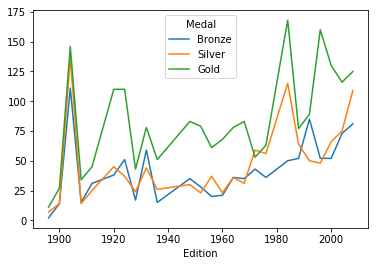

In [229]:
usa_medals_by_year.plot()

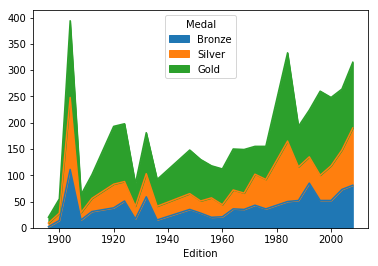

In [230]:
usa_medals_by_year.plot.area()

In [224]:
olympic.Medal = pd.Categorical(values=olympic.Medal, categories=['Bronze', 'Silver', 'Gold'], ordered=True)
